# Tensorflow estimator API

## Importing the required libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

## Creating the dataset

In [0]:
x_data = np.linspace(0.0, 10.0, 1000000)

In [0]:
noise = np.random.randn(len(x_data))

In [0]:
y_true = (0.5 * x_data) + 5 + noise

In [0]:
x_df = pd.DataFrame(data = x_data, columns = ['X Data'])
y_df = pd.DataFrame(data = y_true, columns = ['Y'])
my_data = pd.concat([x_df, y_df], axis = 1)

## Defining a list of feature columns

In [0]:
feature_cols = [tf.feature_column.numeric_column('x', shape = [1])] # key and shape

## Defining the estimator model

In [4]:
estimator = tf.estimator.LinearRegressor(feature_columns = feature_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmps3wwlnoj', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fba1baaa5f8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_true, test_size = 0.3, random_state = 101)

In [12]:
print(X_train.shape)

(700000,)


In [13]:
print(X_test.shape)

(300000,)


## Creating the data input function

In [0]:
input_func = tf.estimator.inputs.numpy_input_fn({'x': X_train}, y_train, batch_size = 8, num_epochs = None, shuffle = True)

In [0]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x': X_train}, y_train, batch_size = 8, num_epochs = 1000, shuffle = False)

In [0]:
test_input_func = tf.estimator.inputs.numpy_input_fn({'x': X_test}, y_test, batch_size = 8, num_epochs = 1000, shuffle = False)

In [17]:
estimator.train(input_fn = input_func, steps = 1000)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmps3wwlnoj/model.ckpt.
INFO:tensorflow:loss = 380.3407, step = 1
INFO:tensorflow:global_step/sec: 649.249
INFO:tensorflow:loss = 29.265453, step = 101 (0.158 sec)
INFO:tensorflow:global_step/sec: 875.482
INFO:tensorflow:loss = 33.29673, step = 201 (0.113 sec)
INFO:tensorflow:global_step/sec: 865.337
INFO:tensorflow:loss = 10.152459, step = 

## Getting the evaluation matrix

In [18]:
train_metrics = estimator.evaluate(input_fn = train_input_func, steps = 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-21T10:32:05Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /tmp/tmps3wwlnoj/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-04-21-10:32:06
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0484917, global_step = 1000, label/mean = 7.5090327, loss = 8.387934, predicti

In [19]:
test_metrics = estimator.evaluate(input_fn = test_input_func, steps = 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-21T10:33:05Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmps3wwlnoj/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-04-21-10:33:06
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1174428, global_step = 1000, label/mean = 7.484585, loss = 8.939543, prediction/mean = 7.3685303
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 100

In [21]:
print("Training Data Metrics:")
print(train_metrics)

Training Data Metrics:
{'average_loss': 1.0484917, 'label/mean': 7.5090327, 'loss': 8.387934, 'prediction/mean': 7.389661, 'global_step': 1000}


In [22]:
print("Test Data Metrics:")
print(test_metrics)

Test Data Metrics:
{'average_loss': 1.1174428, 'label/mean': 7.484585, 'loss': 8.939543, 'prediction/mean': 7.3685303, 'global_step': 1000}


### What is a good model?

If the loss in the train and test metrics are comparable, the model is a good!

## Predicting new values

In [0]:
new_data = np.linspace(1, 10, 10)

In [0]:
pred_input_func = tf.estimator.inputs.numpy_input_fn({'x': new_data}, shuffle = False)

In [26]:
list(estimator.predict(input_fn = pred_input_func))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmps3wwlnoj/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([5.047893], dtype=float32)},
 {'predictions': array([5.633007], dtype=float32)},
 {'predictions': array([6.2181215], dtype=float32)},
 {'predictions': array([6.803236], dtype=float32)},
 {'predictions': array([7.38835], dtype=float32)},
 {'predictions': array([7.9734645], dtype=float32)},
 {'predictions': array([8.5585785], dtype=float32)},
 {'predictions': array([9.143693], dtype=float32)},
 {'predictions': array([9.728807], dtype=float32)},
 {'predictions': array([10.313921], dtype=float32)}]

In [27]:
predictions = []
for pred in estimator.predict(input_fn = pred_input_func):
    predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmps3wwlnoj/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [28]:
predictions

[array([5.047893], dtype=float32),
 array([5.633007], dtype=float32),
 array([6.2181215], dtype=float32),
 array([6.803236], dtype=float32),
 array([7.38835], dtype=float32),
 array([7.9734645], dtype=float32),
 array([8.5585785], dtype=float32),
 array([9.143693], dtype=float32),
 array([9.728807], dtype=float32),
 array([10.313921], dtype=float32)]

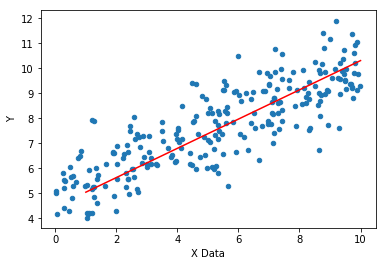

In [33]:
my_data.sample(n = 250).plot(kind = "scatter", x = "X Data", y = "Y")
plt.plot(new_data, predictions, 'r')
plt.show()